In [1]:
#https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python
#This is a follow along with the link above. 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv(r"C:\Users\15402\Documents\House Prices - Advanced Regression Techniques\train.csv")

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

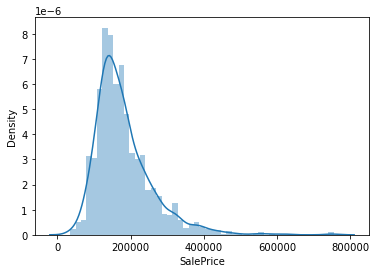

In [5]:
#histogram
sns.distplot(df_train['SalePrice'])

### Sales price deviates from normal distribution. Has an appreciable positive skewness. Shows peakedness.

In [6]:
#skewness and kurtosis
print("Skewness : %f" % df_train['SalePrice'].skew())
print("Kurtosis : %f" % df_train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


 ### Skewness is a measure of symmetry, or more precisely, the lack of symmetry. 
- A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

- Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 
    - That is, data sets with high kurtosis tend to have heavy tails, or outliers. 
    - Data sets with low kurtosis tend to have light tails, or lack of outliers. 
    - A uniform distribution would be the extreme case. 

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

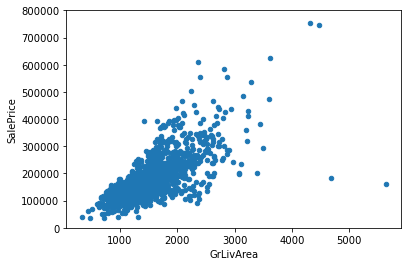

In [7]:
#scatter plot grlivarea/saleprice


data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice',ylim = (0,800000))

### It appears that 'GrLivArea' and 'SalePrice' hold a linear relationship

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

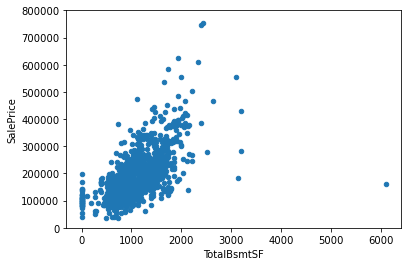

In [8]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis = 1)
data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim = (0,800000))

Appears exponential relationship between TotalBsmtSF and SalePrice

Relationship with Categorical Features

(-0.5, 9.5, 0.0, 800000.0)

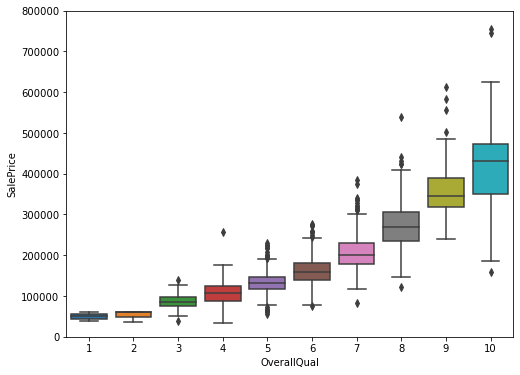

In [9]:
#box plot overallqual/saleprice
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis = 1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x = 'OverallQual',y="SalePrice",data= data)
fig.axis(ymin = 0, ymax = 800000)

Sale price seems to increase with an increase in overall quality. Also the effect of overall quality has to sale price seems to gradually weaken as it icreases. The candle sticks are a lot taller with a broader range in '10' vs in '3' for example

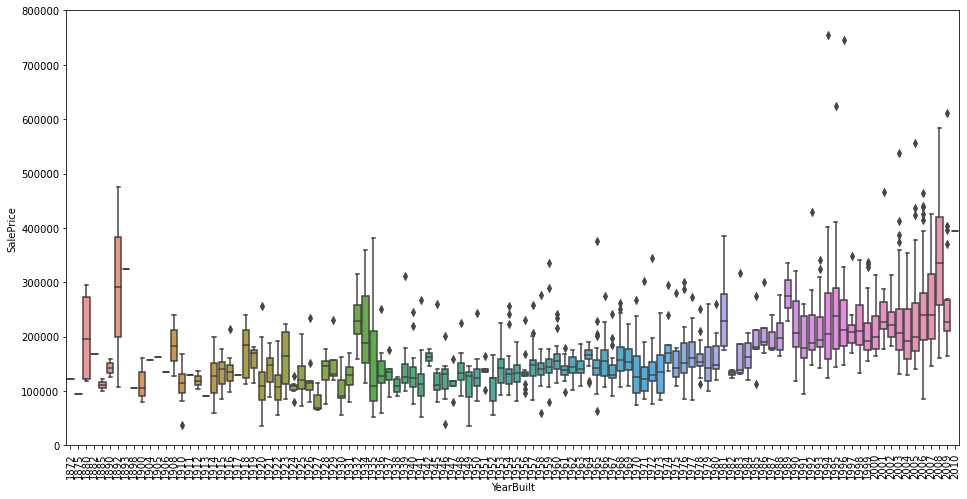

In [10]:
data = pd.concat([df_train['SalePrice'],df_train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x = 'YearBuilt',y = "SalePrice",data=data)
fig.axis(ymin=0,ymax=800000);
plt.xticks(rotation = 90);

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).


The 'plasma soup'

'In the very beginning there was nothing except for a plasma soup. What is known of these brief moments in time, at the start of our study of cosmology, is largely conjectural. However, science has devised some sketch of what probably happened, based on what is known about the universe today.' (source: http://umich.edu/~gs265/bigbang.htm)

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':

    Correlation matrix (heatmap style).
    'SalePrice' correlation matrix (zoomed heatmap style).
    Scatter plots between the most correlated variables (move like Jagger style).



Correlation matrix (heatmap style)

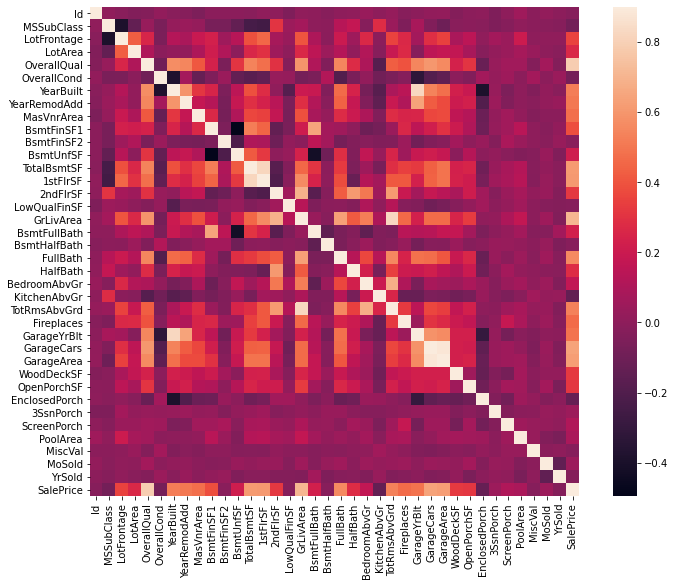

In [11]:
#Correlation Matrix heatmap style
corrmatrix = df_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmatrix, vmax =.9, square = True);


 'GrLivArea', 'TotalBsmtSF' and 'OverallQual'all correlate well with saleprice. 
 
 Also At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 

### 'SalePrice' correlation matrix (zoomed heatmap style)

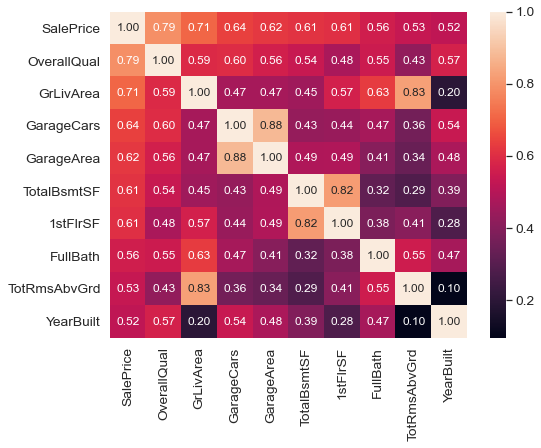

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heat map
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize = (8,6))
hm = sns.heatmap(cm, cbar = True, annot=True, fmt = '.2f', annot_kws = {'size':12},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 

'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 

we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' 

'FullBath'

'TotRmsAbvGrd' and 'GrLivArea' are also twins

'YearBuilt'  may require a timestudy


Scatterplots between 'SalePrice' and correlated variables

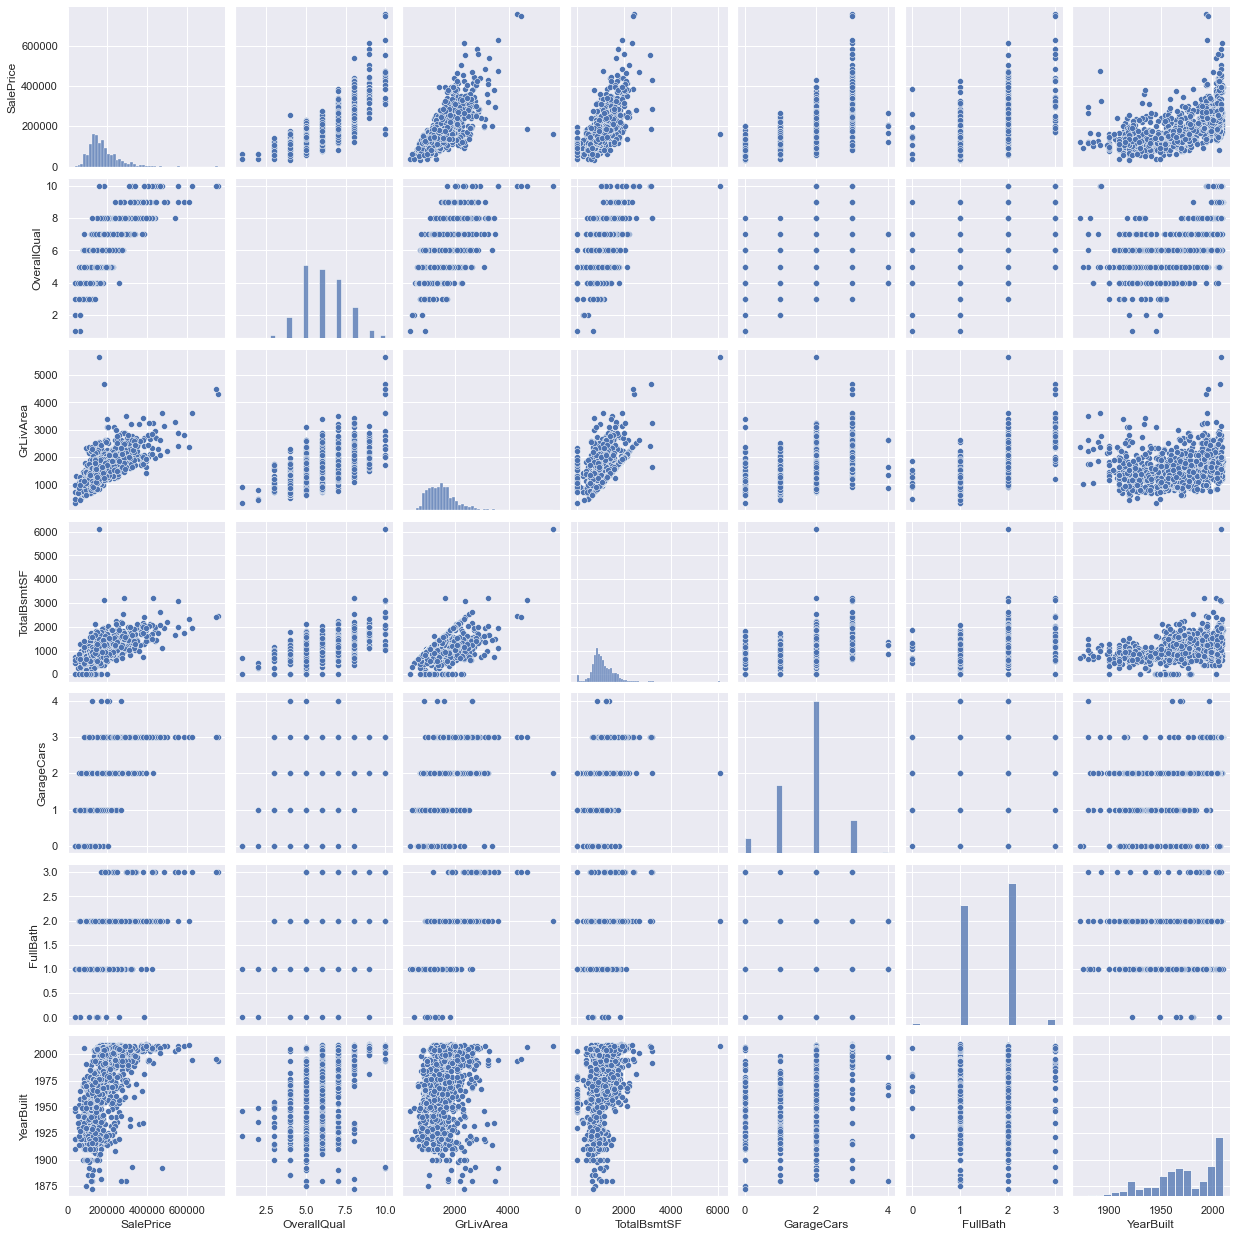

In [13]:
#scatterplots
sns.set()
cols = ['SalePrice','OverallQual', 'GrLivArea', 'TotalBsmtSF','GarageCars','FullBath','YearBuilt',]
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Find Missing Data patterns

In [14]:
#missing data 
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. 

'PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage' are all over 15% so they can go

The Garage variables with missing data can all go since we are going to use the GarageCars variable anyway.

The Bsmt variables can all go as well since we are just going to use TotalBasmtSF anyway

The MasVnrArea and MasVnrType are not essential. Furthermore, they have a strong relationship with 'YearBuilt' and 'OverallQual' anyway.

Since Electrical has just one missing we can delete it and keep Electrical

In [15]:
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking to see if there is any missing data

0

# Outliers

### Univariate Analysis

#### First we will standardize the data, making the mean 0 with a standard deviation of 1

In [16]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### What can we take away from this? 


- Low range values are similar and not too far from 0.
- High range values are far from 0. The 7+ values are really out of range!
- Be careful with the 7.something values as they could be outliers!

## Bivariate Analysis

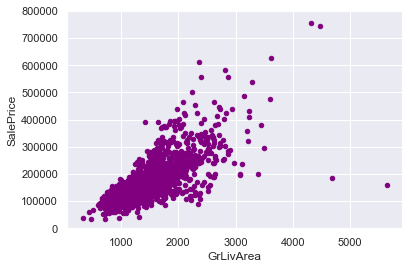

In [17]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,800000), color = 'purple');

### What can we draw from this?


- The two relativley inexpensive  ~200k homes far to the right with 4.7k - 5.8k sqft may refer to agricultural or rural land. This could explain the low price relative to the trend. They do not appear to fit the trend so they will be deleted.
- The two closely positioned data points hovering around 4400,750000 seem to follow the trend and are probably not outliers. They are the 7.somethings we saw earlier. We will keep these. 

In [18]:
#deleting points (the farmland points)
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2] # this is how to find the last values
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

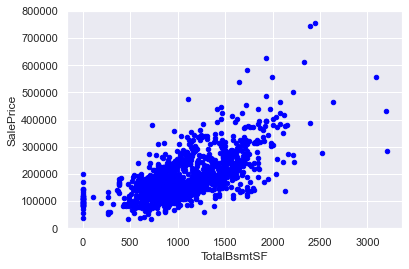

In [19]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,800000), color = 'blue');

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

## Getting Hardcore

#### Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

#### According to Hair et al. (2013), four assumptions should be tested:

-    __Normality__ - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that __univariate normality doesn't ensure multivariate normality__ (which is what we would like to have), but it helps. Another detail to take into account is that in **big samples (>200 observations) normality is not such an issue.** However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.


-    __Homoscedasticity__ - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because __we want the error term to be the same across all values of the independent variables.__


-    __Linearity__- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because __most of the scatter plots we've seen appear to have linear relationships.__


-    __Absence of correlated errors__ - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.


## In the search for normality

Lets look at 'SalePrice' 

- __Histogram__ - Kurtosis and skewness


- __Normal Probability Plot__ - Data distribution should closely follow the diagonal that represents the normal distribution

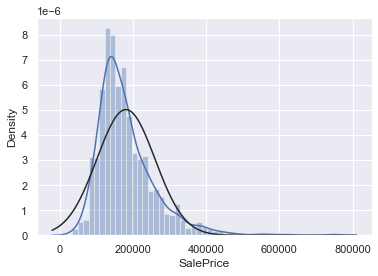

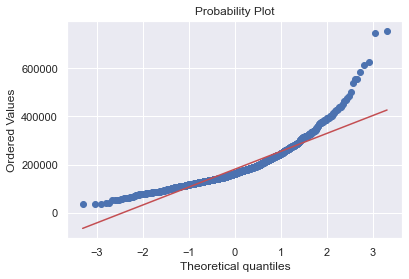

In [26]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

### Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.
#### A simple data transformation can solve the problem. 
- In case of positive skewness, __log__ transformations usually works well.

In [28]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

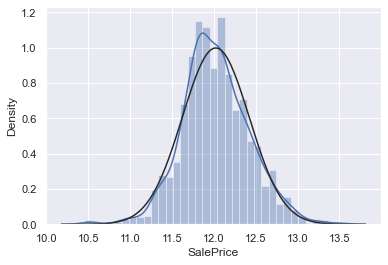

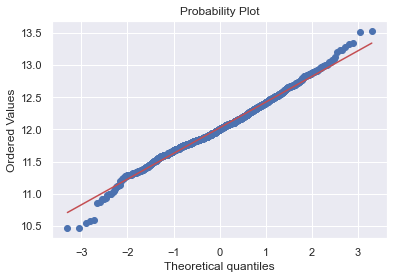

In [29]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'],fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

Looks good! Now lets see what is going on with 'GrLivArea'

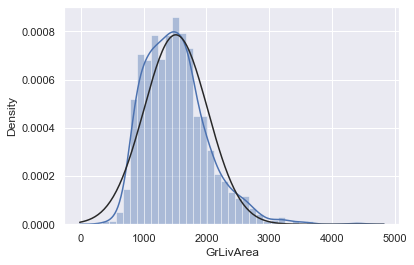

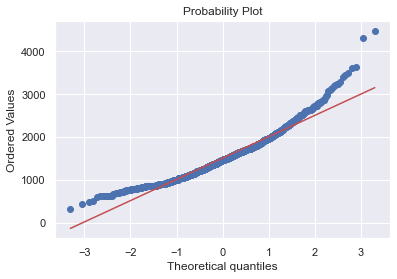

In [32]:
#histogram and normal probability plot
var = 'GrLivArea'
sns.distplot(df_train[var], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[var], plot = plt)

It appears skewed as well so lets apply another log transformation

In [33]:
#applying log transformation
var = 'GrLivArea'
df_train[var] = np.log(df_train[var])

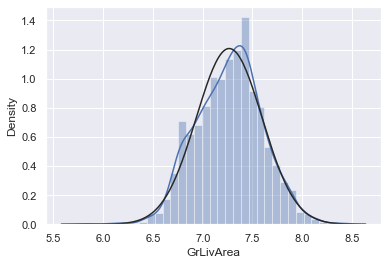

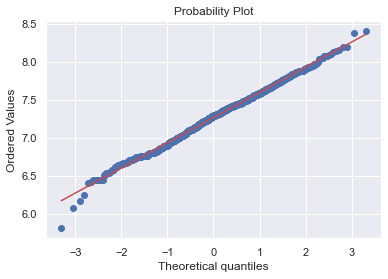

In [34]:
#transformed histogram and normal probability plot
var = 'GrLivArea'
sns.distplot(df_train[var],fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[var], plot = plt)

Looks a lot better. On to 'TotalBsmtSF'

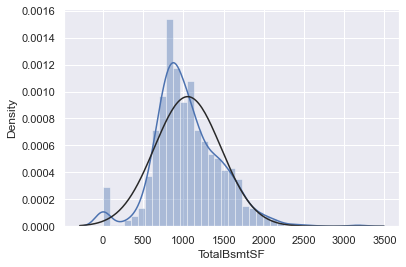

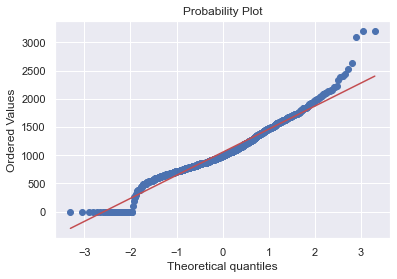

In [35]:
#histogram and normal probability plot
var = 'TotalBsmtSF'
sns.distplot(df_train[var], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[var], plot = plt)



Ok, now we are dealing with the big boss. What do we have here?

   - Something that, in general, presents skewness.
   - A significant number of observations with __value zero (houses without basement).__
   - A big problem because the __value zero doesn't allow us to do log transformations.__

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.


In [41]:
# create a column for a new variable (one is enough because it is a binary categorical feature)
#if area>0 it gets a 1, for area == 0 it gets 0

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index) #creating a series the same size as the length of df_train['TotalBsmtSF']
df_train['HasBsmt'] = 0 #setting all the values to 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1 #changing the values to 1 if the Basement square footage is greater than 0

In [46]:
#transform data
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

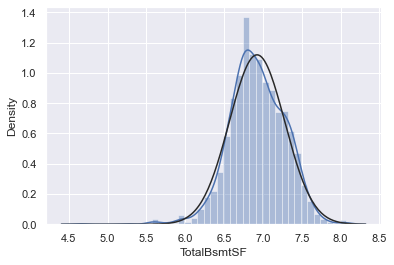

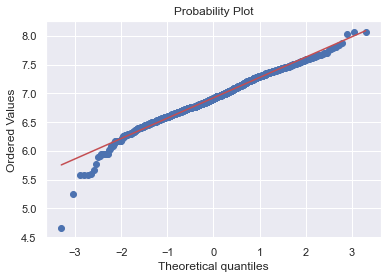

In [47]:
# histogram and normal probablity plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot =plt)

### In the search for writing 'homoscedasticity' right after the first attempt



The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...


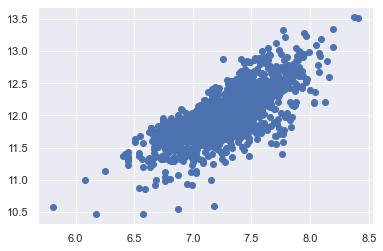

In [48]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

The first time we plotted this above (without log transformation) it made the shape of a cone. Now it does not have this shape. That is the power of __normality__ Only by ensuring normality in some variable, we solved the homoscedasticity problem.  

Now onto 'SalePrice' with 'TotalBsmtSF'

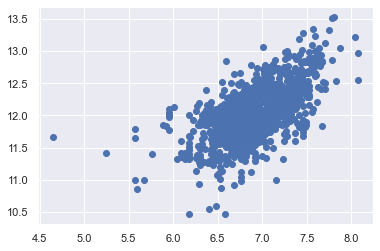

In [52]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

#

Judging from our scatterplot above, we can state that 'SalePrice' exhibits equal levels of variance across the entire range of 'TotalBsmtSF'. 

## Last but not least, dummy variables

In [53]:
#convert categoriacl variable into dummy
df_train = pd.get_dummies(df_train)